# Proyecto Final - Introduccion a la ciencia de datos
* Alejandro Marin Hoyos
* Manuel Antonio Vidales
* Yessica Fernanda Villa  
### 1. Análisis Descriptivo del Dataset

Importacion de las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(plt.style.available)


plt.style.use('seaborn-v0_8')


%matplotlib inline

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Se carga el dataset

In [2]:
# Cargar datos
df = pd.read_csv('../data/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# Características (Inputs)
* N – Contenido de nitrógeno en el suelo (in mg/kg)
* P – Contenido de fósforo en el suelo (in mg/kg)
* K – Contenido de potasio en el suelo (in mg/kg)
* temperatura – Temperatura promedio en °C
* humedad – Humedad relativa media en %
* ph – Valor de pH del suelo
* lluvia – lluvia en mm 

In [3]:
# Estructura del dataset
df.info()

# Estadísticas descriptivas
df.describe(include='all').transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N,2200.0,NaN,NaN,NaN,50.551818,36.917334,0.0,21.0,37.0,84.25,140.0
P,2200.0,NaN,NaN,NaN,53.362727,32.985883,5.0,28.0,51.0,68.0,145.0
K,2200.0,NaN,NaN,NaN,48.149091,50.647931,5.0,20.0,32.0,49.0,205.0
temperature,2200.0,NaN,NaN,NaN,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,NaN,NaN,NaN,71.481779,22.263812,14.25804,60.261953,80.473146,89.948771,99.981876
ph,2200.0,NaN,NaN,NaN,6.46948,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,NaN,NaN,NaN,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117
label,2200,22,rice,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar balance de clases
print("\nDistribución de clases (cultivos):")
print(df['label'].value_counts())


Valores nulos por columna:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Distribución de clases (cultivos):
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


# Histograma de variables numericas

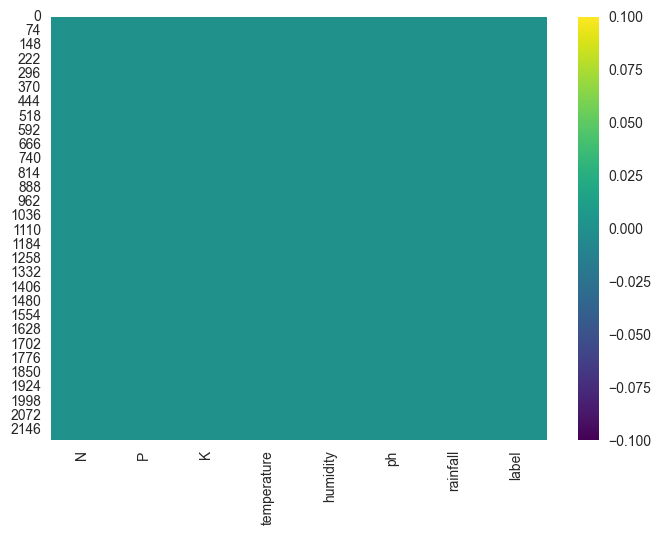

In [11]:
sns.heatmap(df.isnull(), cbar=True , cmap='viridis')
plt.show()

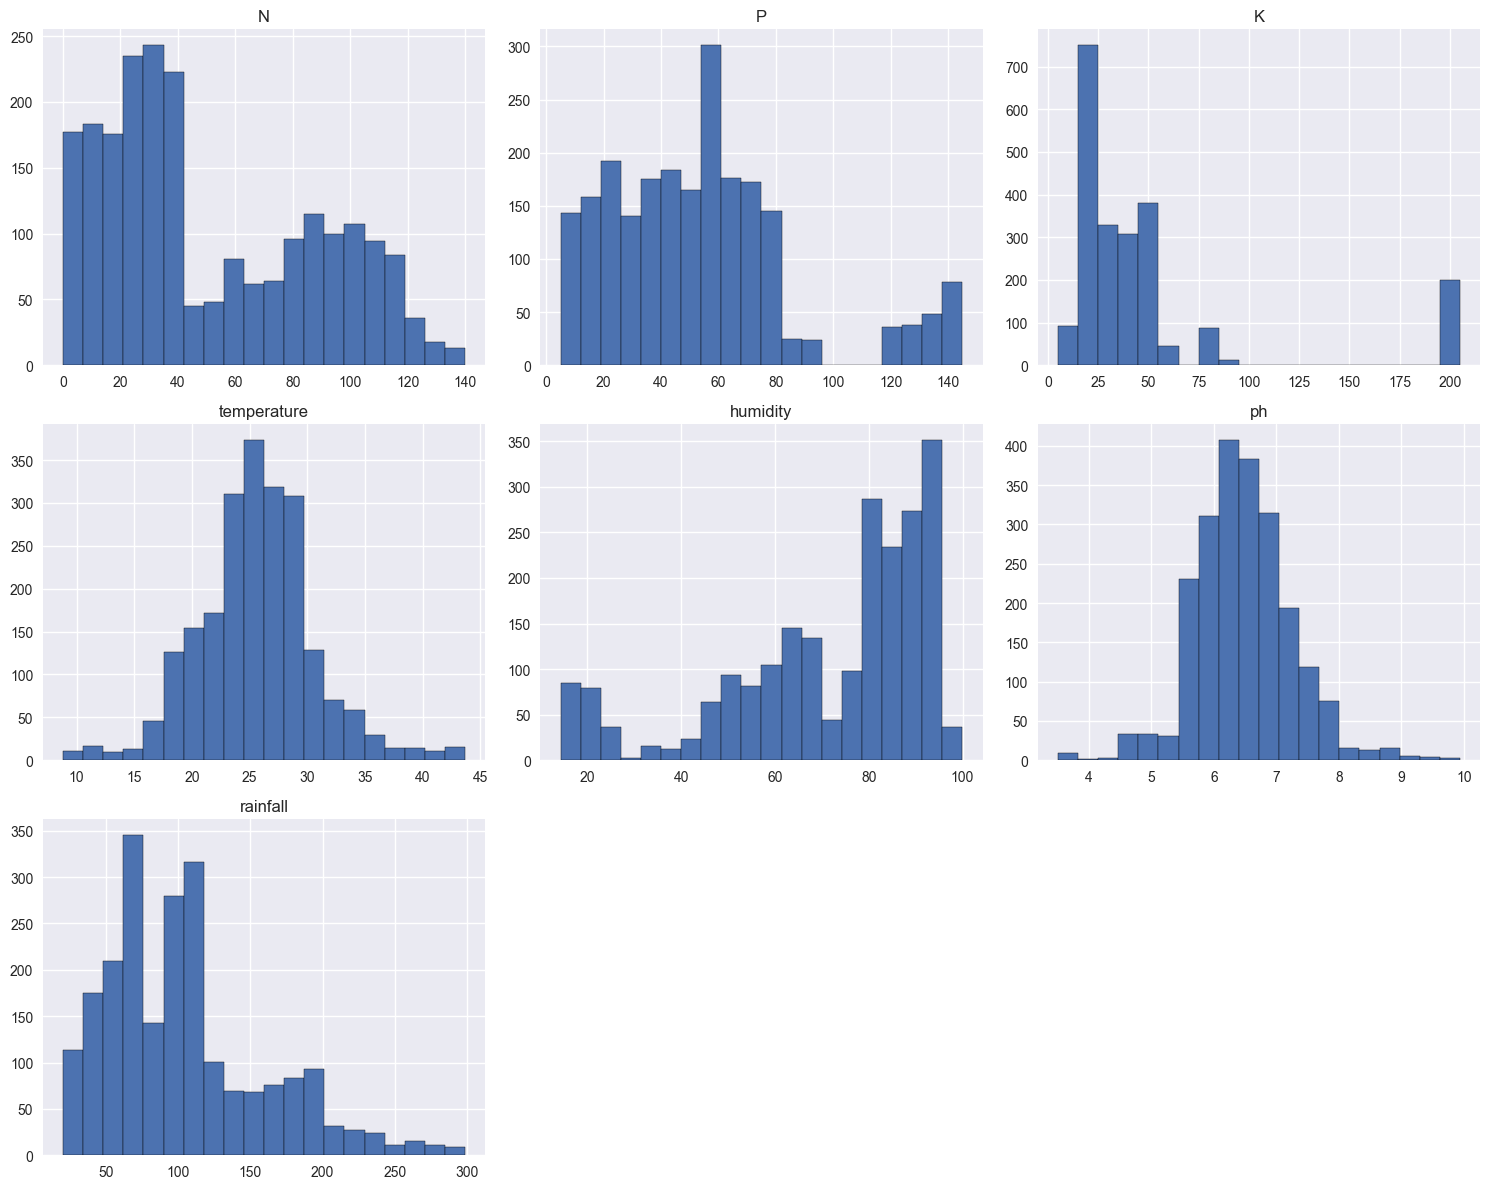

In [12]:
# Histogramas para variables numéricas
df.hist(figsize=(15, 12),  bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Distribución de Macronutrientes y Variables Climáticas
* Nitrógeno (N):
- Rango principal: 20-80 kg/ha
- Distribución irregular con múltiples picos
- Concentración en valores medios (40-60 kg/ha)

* Fósforo (P):
- Valores típicos: 20-60 kg/ha
- Distribución sesgada hacia la izquierda
- Frecuencia máxima en 30-40 kg/ha

* Potasio (K):
- Amplio rango: 25-175 kg/ha
- Dos picos notables (~50 y ~125 kg/ha)
- Posible mezcla de diferentes tipos de suelos o cultivos

# Variables Climáticas
* Temperatura:
- Mayor frecuencia: 20-40°C (óptimo para muchos cultivos)
- Pocos registros extremos (>80°C probablemente errores)

* Humedad 
- Distribución uniforme entre 60-100%
- Mínimos alrededor de 20% (condiciones áridas)

* pH del suelo
- Rango óptimo dominante: 5.5-7 (levemente ácido a neutro)
- Pico pronunciado en ~6.5
- Escasos valores extremos (<4 o >8)

# Interpretación Agronómica
- Los nutrientes muestran distribuciones variables, sugiriendo diferentes prácticas de fertilización
- Las condiciones climáticas registradas son típicas de zonas tropicales/subtropicales
- El pH del suelo indica suelos mayormente adecuados para agricultura general
- La presencia de múltiples picos en K y N podría reflejar diferentes cultivos en el dataset

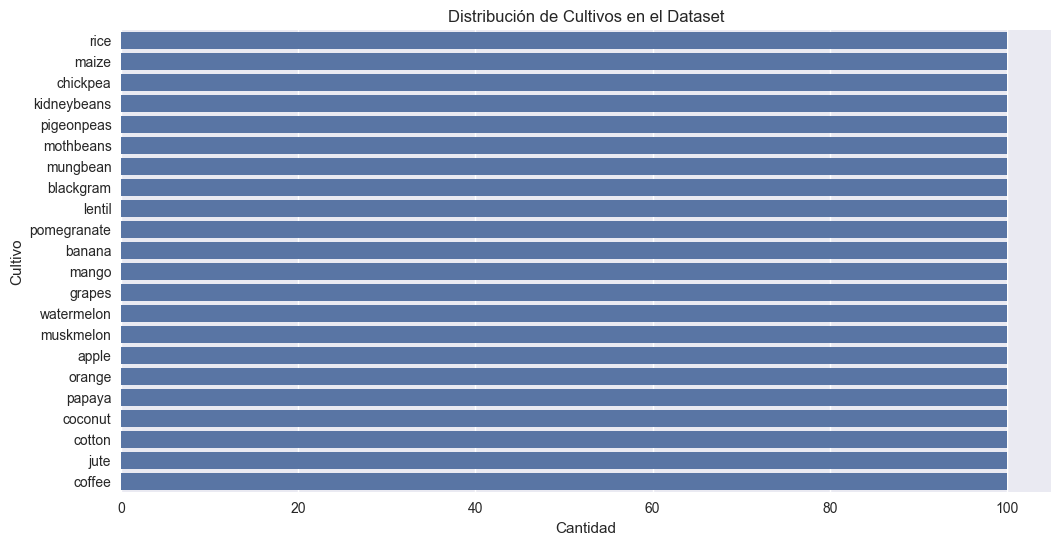

In [6]:
# Gráfico de barras para la distribución de cultivos
plt.figure(figsize=(12, 6))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index)
plt.title('Distribución de Cultivos en el Dataset')
plt.xlabel('Cantidad')
plt.ylabel('Cultivo')
plt.show()

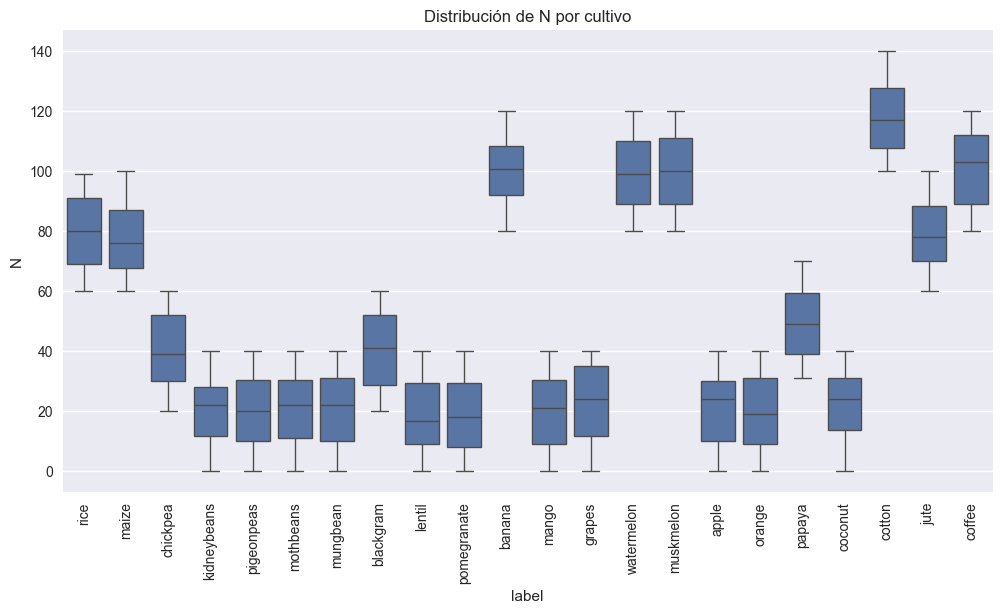

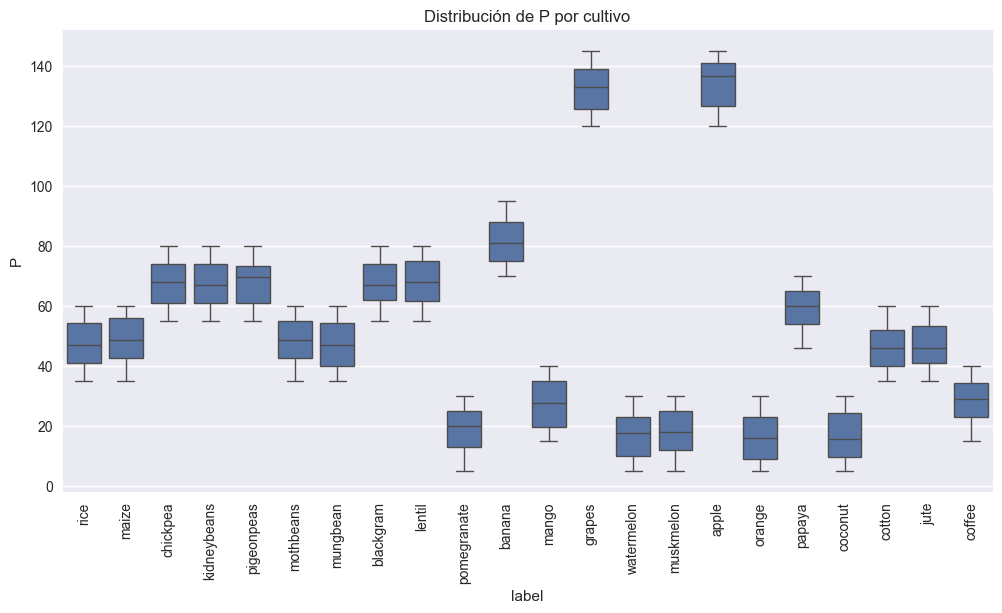

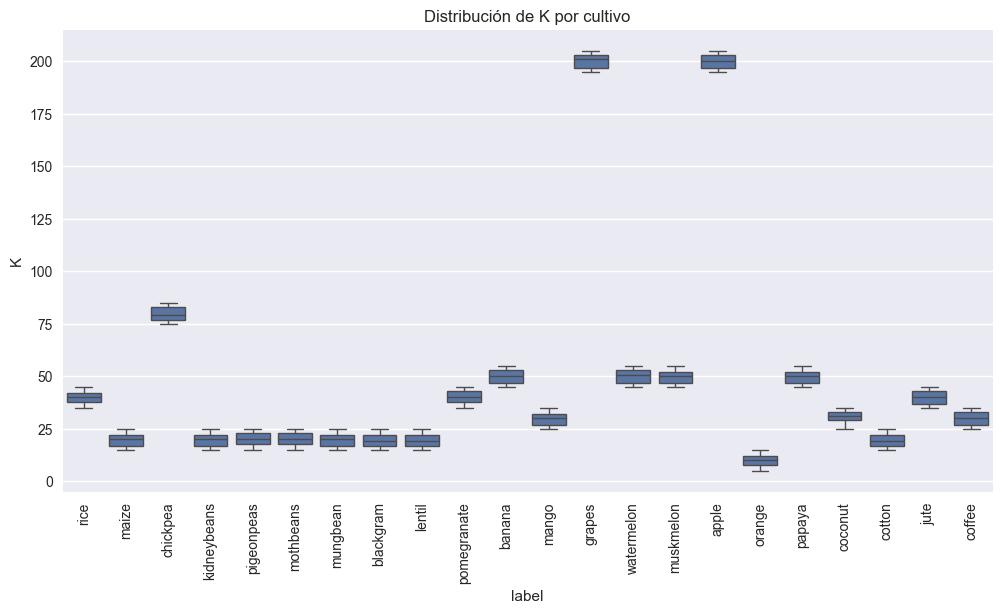

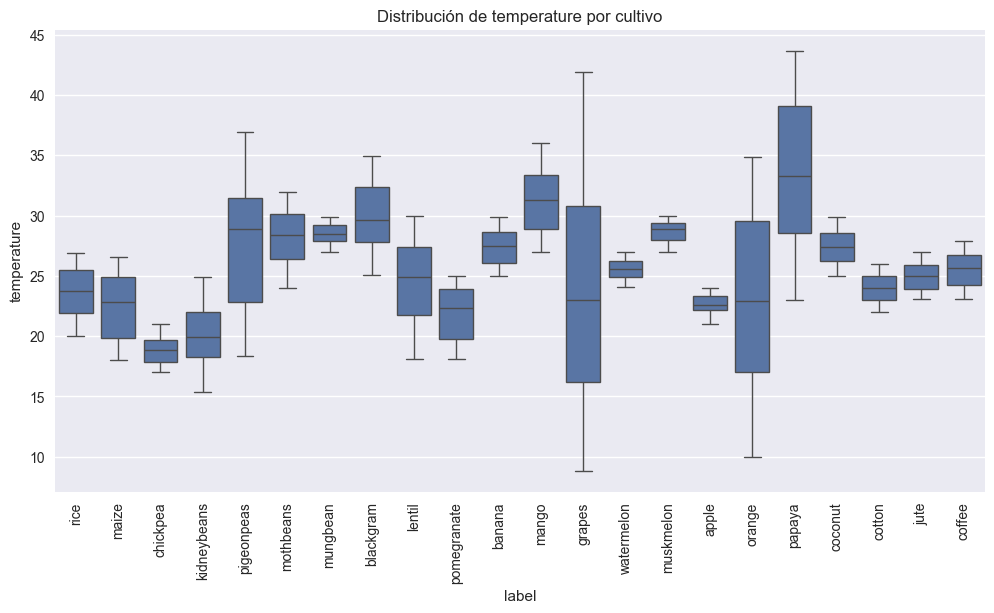

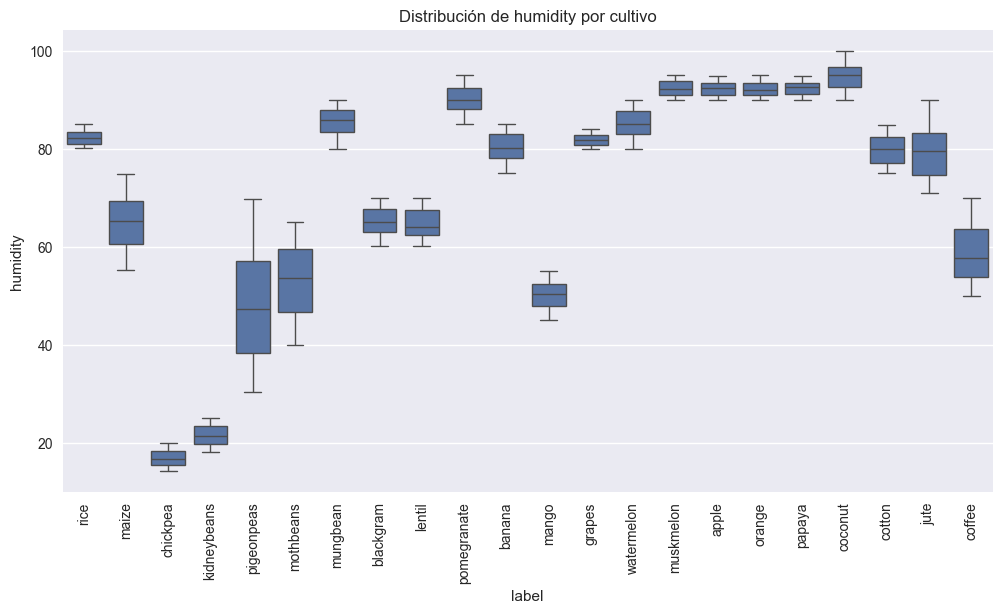

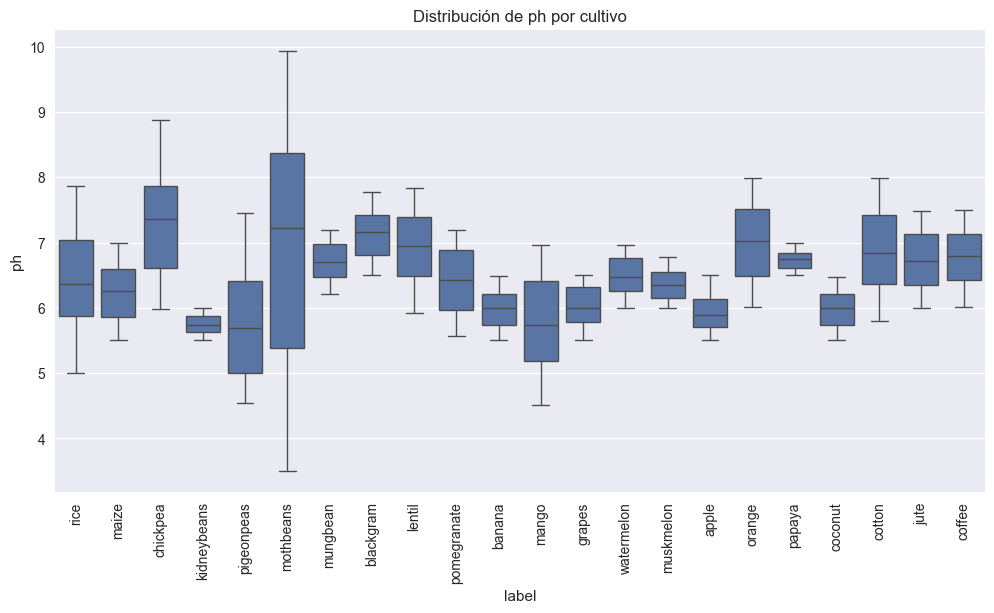

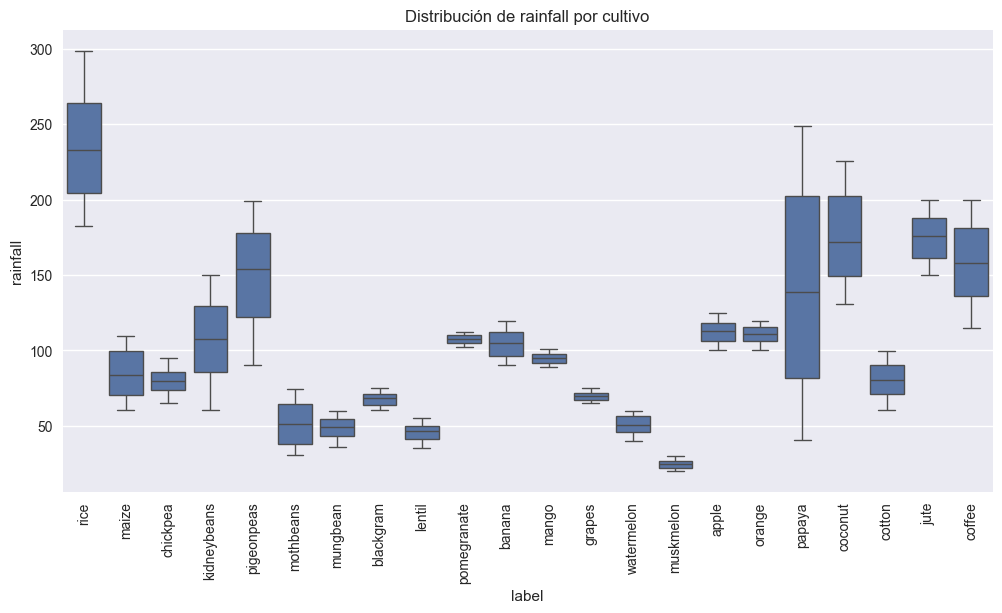

In [7]:
# Boxplots para variables por cultivo
variables = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y=var, data=df)
    plt.title(f'Distribución de {var} por cultivo')
    plt.xticks(rotation=90)
    plt.show()

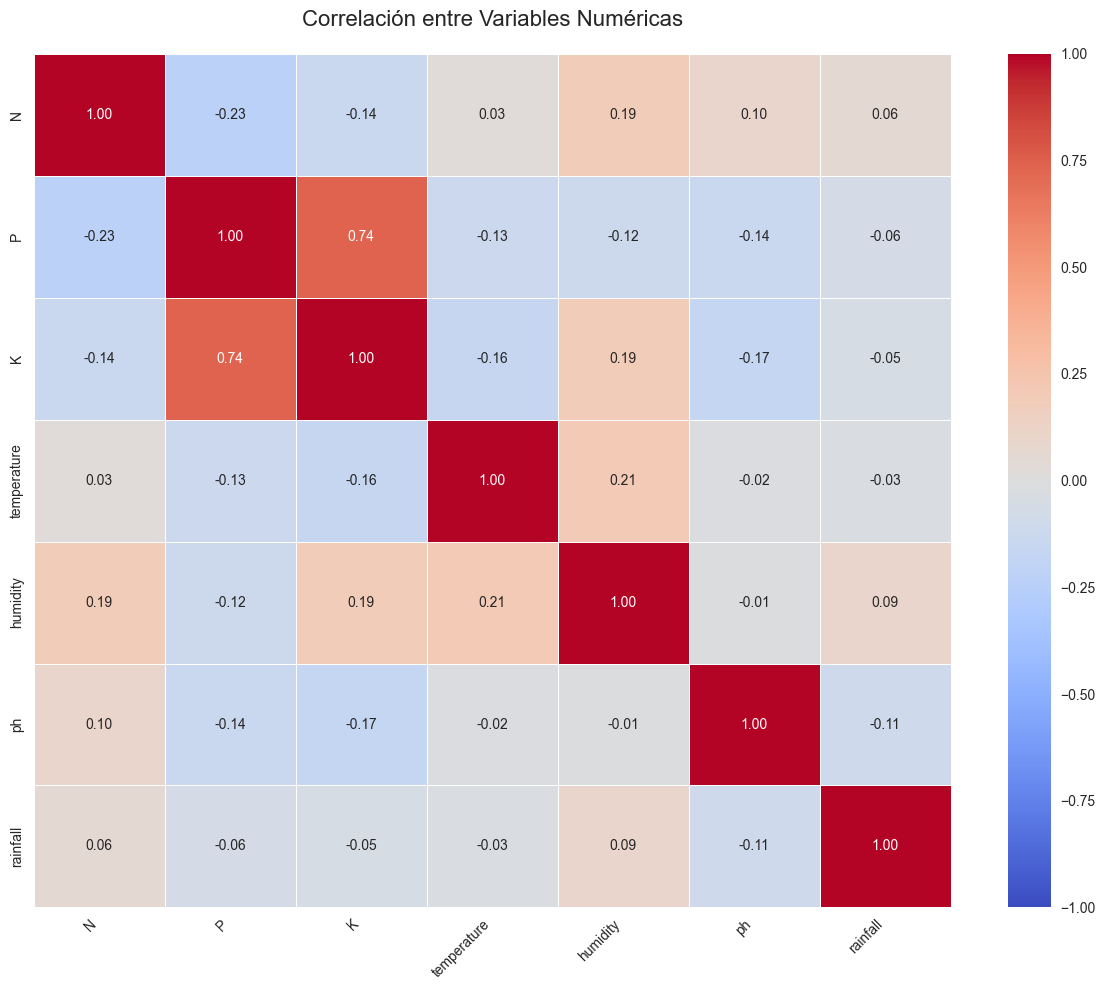

In [8]:
# Versión corregida del mapa de calor
plt.figure(figsize=(12, 10))

# Seleccionar solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Crear el mapa de calor de correlación
sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            linewidths=0.5, 
            annot_kws={"size": 10},
            fmt=".2f")  # Formato de 2 decimales

# Añadir título
plt.title('Correlación entre Variables Numéricas', fontsize=16, pad=20)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mapa de calor de correlación


El mapa de calor mostrado representa la matriz de correlación entre las variables numéricas del dataset.
Cada celda indica el coeficiente de correlación  entre dos variables, con valores entre -1 y 1:

- Un valor cercano a 1 indica una correlación positiva fuerte: cuando una variable aumenta, la otra también tiende a aumentar.
- Un valor cercano a -1 indica una correlación negativa fuerte: cuando una variable aumenta, la otra tiende a disminuir.
- Un valor cercano a 0 indica poca o ninguna correlación lineal entre las variables.

En el gráfico, los colores más intensos (rojo y azul) representan correlaciones más fuertes (positivas o negativas), mientras que los colores más claros indican correlaciones débiles o nulas.

Este análisis ayuda a identificar relaciones entre variables, posibles redundancias y patrones que pueden ser útiles para la selección de variables o la interpretación de modelos.


Text(0.5, 1.0, 'Relación Lluvia vs Humedad por Cultivo')

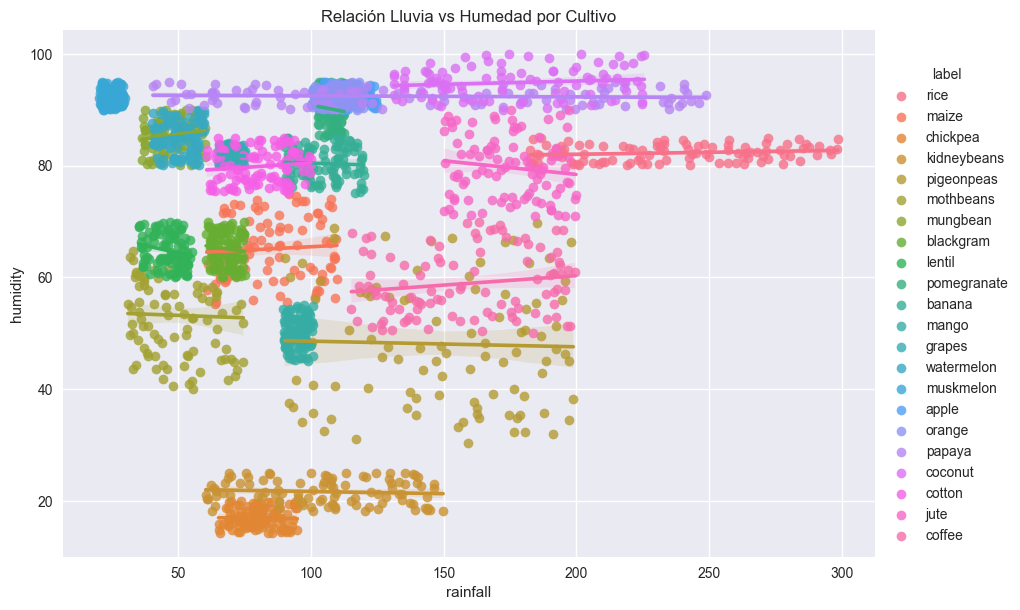

In [9]:
#Gráficos de dispersión (scatter plots) Relación Lluvia vs Humedad por Cultivo
sns.lmplot(x='rainfall', y='humidity', data=df, hue='label', height=6, aspect=1.5)
plt.title('Relación Lluvia vs Humedad por Cultivo')

# Precipitación (rainfall) y humedad (humidity) para diferentes tipos de cultivos.

Tendencias observables:

Los cultivos parecen distribuirse en todo el rango de humedad y precipitación

No hay una correlación clara general (algunos cultivos requieren mucha lluvia con poca humedad y viceversa)

Cultivos como arroz (rice) probablemente aparecen en zonas de alta humedad y precipitación

Cultivos como algodón (cotton) o mango podrían estar en zonas medias

Cultivos resistentes como lentejas (lentil) o garbanzos (chickpea) suelen aparecer en zonas de menor humedad/precipitación

Aplicación:

Este tipo de gráfico ayuda a agricultores a seleccionar cultivos adecuados para las condiciones climáticas de su región